In [1]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
abp,0,0,0,2,1,0,2,0
abramowic,0,0,0,0,0,0,0,1
absurdy,0,0,0,0,0,0,0,1
aby,0,0,2,8,3,2,4,3
adam,1,0,2,3,0,6,0,0


In [4]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(100)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'2020-01': [('szpitala', 5),
  ('haidar', 4),
  ('za', 4),
  ('polecany', 3),
  ('prezydenta', 3),
  ('białej', 3),
  ('został', 3),
  ('artykuł', 3),
  ('podlaskiej', 3),
  ('też', 2),
  ('wpisie', 2),
  ('facebooku', 2),
  ('pacjentów', 2),
  ('miasta', 2),
  ('haidara', 2),
  ('mojej', 2),
  ('władz', 2),
  ('decyzja', 2),
  ('stronę', 2),
  ('obywatelskiej', 2),
  ('zjednoczonej', 2),
  ('wsparcie', 2),
  ('prawie', 2),
  ('jednocześnie', 2),
  ('gdańska', 2),
  ('prawicy', 2),
  ('pracy', 2),
  ('oddział', 2),
  ('którzy', 2),
  ('zwolniony', 2),
  ('chodzińskiego', 2),
  ('dyrektora', 2),
  ('riad', 2),
  ('adama', 2),
  ('koalicji', 2),
  ('lat', 2),
  ('radnego', 2),
  ('prezydent', 2),
  ('oświaty', 1),
  ('upgrading', 1),
  ('uznawany', 1),
  ('orkiestrze', 1),
  ('upamiętniających', 1),
  ('uznała', 1),
  ('pożegnałem', 1),
  ('chodziński', 1),
  ('uznania', 1),
  ('uroczystościach', 1),
  ('oraz', 1),
  ('javascript', 1),
  ('lublin', 1),
  ('ostatnich', 1),
  ('mariusz', 

In [5]:
for date, top_words in top_dict.items():
    print(date)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('---')

2020-01
szpitala, haidar, za, polecany, prezydenta, białej, został, artykuł, podlaskiej, też
---
2020-02
kmh, obowiązuje, między, polecany, stopnia, wiatru, ostrzeżenie, porywach, ii, artykuł
---
2020-03
koronawirusa, koronawirus, polsce, artykuł, więcej, polecany, koronawirusem, osób, szpitala, zdrowia
---
2020-04
koronawirusa, osób, koronawirusem, zdrowia, więcej, polsce, liczba, tym, koronawirus, przez
---
2020-05
dzięki, super, reklamy, serwis, rozwijamy, treści, wyświetlaniu, blokując, wyłącz, reklam
---
2020-06
parafii, pw, św, mgr, super, express, wikariusza, mianowany, przeniesiony, nmp
---
2020-07
będzie, hpa, treści, artykuł, polecany, będą, dzięki, serwis, stronę, wyłącz
---
2020-08
dzięki, treści, odśwież, blokując, wyłącz, wyświetlaniu, reklamy, reklam, serwis, adblock
---


In [6]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['szpitala',
 'haidar',
 'za',
 'polecany',
 'prezydenta',
 'białej',
 'został',
 'artykuł',
 'podlaskiej',
 'też',
 'wpisie',
 'facebooku',
 'pacjentów',
 'miasta',
 'haidara',
 'mojej',
 'władz',
 'decyzja',
 'stronę',
 'obywatelskiej',
 'zjednoczonej',
 'wsparcie',
 'prawie',
 'jednocześnie',
 'gdańska',
 'prawicy',
 'pracy',
 'oddział',
 'którzy',
 'zwolniony',
 'chodzińskiego',
 'dyrektora',
 'riad',
 'adama',
 'koalicji',
 'lat',
 'radnego',
 'prezydent',
 'oświaty',
 'upgrading',
 'uznawany',
 'orkiestrze',
 'upamiętniających',
 'uznała',
 'pożegnałem',
 'chodziński',
 'uznania',
 'uroczystościach',
 'oraz',
 'javascript',
 'lublin',
 'ostatnich',
 'mariusz',
 'lublina',
 'całe',
 'prasowy',
 'jakiś',
 'jako',
 'zmarłego',
 'stanowisku',
 'stanowią',
 'były',
 'utworu',
 'było',
 'osoba',
 'uwadze',
 'zdaniem',
 'stanęli',
 'pracował',
 'owsiakowi',
 'panu',
 'budynkiem',
 'budynek',
 'leczenie',
 'symboliczny',
 'pełnieniu',
 'bierze',
 'posłów',
 'kazał',
 'posła',
 'tłumaczy'

In [7]:
Counter(words).most_common()

[('polecany', 7),
 ('artykuł', 7),
 ('też', 7),
 ('stronę', 7),
 ('oraz', 7),
 ('dzięki', 7),
 ('przez', 7),
 ('za', 6),
 ('tym', 6),
 ('treści', 6),
 ('pozwalasz', 6),
 ('kraju', 6),
 ('wyświetlaniu', 6),
 ('wartościowych', 6),
 ('serwis', 6),
 ('wyłącz', 6),
 ('tworzyć', 6),
 ('rozwijamy', 6),
 ('odśwież', 6),
 ('adblock', 6),
 ('reklam', 6),
 ('reklamy', 6),
 ('blokując', 6),
 ('mogą', 5),
 ('więcej', 5),
 ('ze', 5),
 ('lublinie', 5),
 ('który', 5),
 ('przy', 5),
 ('ale', 5),
 ('tys', 4),
 ('polsce', 4),
 ('osób', 4),
 ('zobacz', 4),
 ('informuje', 4),
 ('mężczyzna', 4),
 ('będzie', 4),
 ('tylko', 4),
 ('roku', 4),
 ('szpitala', 3),
 ('pacjentów', 3),
 ('lat', 3),
 ('woj', 3),
 ('lubelskiego', 3),
 ('koronawirusem', 3),
 ('osoby', 3),
 ('które', 3),
 ('polski', 3),
 ('potwierdzono', 3),
 ('tego', 3),
 ('czytaj', 3),
 ('domu', 3),
 ('będą', 3),
 ('także', 3),
 ('dni', 3),
 ('super', 3),
 ('zł', 3),
 ('policjanci', 3),
 ('był', 3),
 ('został', 2),
 ('którzy', 2),
 ('zwolniony', 2),
 (

In [9]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 0]
add_stop_words

['polecany',
 'artykuł',
 'też',
 'stronę',
 'oraz',
 'dzięki',
 'przez',
 'za',
 'tym',
 'treści',
 'pozwalasz',
 'kraju',
 'wyświetlaniu',
 'wartościowych',
 'serwis',
 'wyłącz',
 'tworzyć',
 'rozwijamy',
 'odśwież',
 'adblock',
 'reklam',
 'reklamy',
 'blokując',
 'mogą',
 'więcej',
 'ze',
 'lublinie',
 'który',
 'przy',
 'ale',
 'tys',
 'polsce',
 'osób',
 'zobacz',
 'informuje',
 'mężczyzna',
 'będzie',
 'tylko',
 'roku',
 'szpitala',
 'pacjentów',
 'lat',
 'woj',
 'lubelskiego',
 'koronawirusem',
 'osoby',
 'które',
 'polski',
 'potwierdzono',
 'tego',
 'czytaj',
 'domu',
 'będą',
 'także',
 'dni',
 'super',
 'zł',
 'policjanci',
 'był',
 'został',
 'którzy',
 'zwolniony',
 'lublina',
 'było',
 'pan',
 'między',
 'stopnia',
 'wielu',
 'lubelszczyźnie',
 'godz',
 'blisko',
 'imgw',
 'koronawirusa',
 'koronawirus',
 'zdrowia',
 'szpitalu',
 'dwóch',
 'zielonej',
 'kolejne',
 'przypadków',
 'wyniki',
 'przypadki',
 'ponad',
 'górze',
 'lubelskim',
 'min',
 'informacje',
 'wszystkie'

In [10]:
from stop_words import get_stop_words
stop_words = get_stop_words('polish')
stop_words

['ach',
 'aj',
 'albo',
 'bardzo',
 'bez',
 'bo',
 'być',
 'ci',
 'cię',
 'ciebie',
 'co',
 'czy',
 'daleko',
 'dla',
 'dlaczego',
 'dlatego',
 'do',
 'dobrze',
 'dokąd',
 'dość',
 'dużo',
 'dwa',
 'dwaj',
 'dwie',
 'dwoje',
 'dziś',
 'dzisiaj',
 'gdyby',
 'gdzie',
 'go',
 'ich',
 'ile',
 'im',
 'inny',
 'ja',
 'ją',
 'jak',
 'jakby',
 'jaki',
 'je',
 'jeden',
 'jedna',
 'jedno',
 'jego',
 'jej',
 'jemu',
 'jeśli',
 'jest',
 'jestem',
 'jeżeli',
 'już',
 'każdy',
 'kiedy',
 'kierunku',
 'kto',
 'ku',
 'lub',
 'ma',
 'mają',
 'mam',
 'mi',
 'mną',
 'mnie',
 'moi',
 'mój',
 'moja',
 'moje',
 'może',
 'mu',
 'my',
 'na',
 'nam',
 'nami',
 'nas',
 'nasi',
 'nasz',
 'nasza',
 'nasze',
 'natychmiast',
 'nią',
 'nic',
 'nich',
 'nie',
 'niego',
 'niej',
 'niemu',
 'nigdy',
 'nim',
 'nimi',
 'niż',
 'obok',
 'od',
 'około',
 'on',
 'ona',
 'one',
 'oni',
 'ono',
 'owszem',
 'po',
 'pod',
 'ponieważ',
 'przed',
 'przedtem',
 'są',
 'sam',
 'sama',
 'się',
 'skąd',
 'tak',
 'taki',
 'tam',
 'ten

In [11]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = stop_words

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [12]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

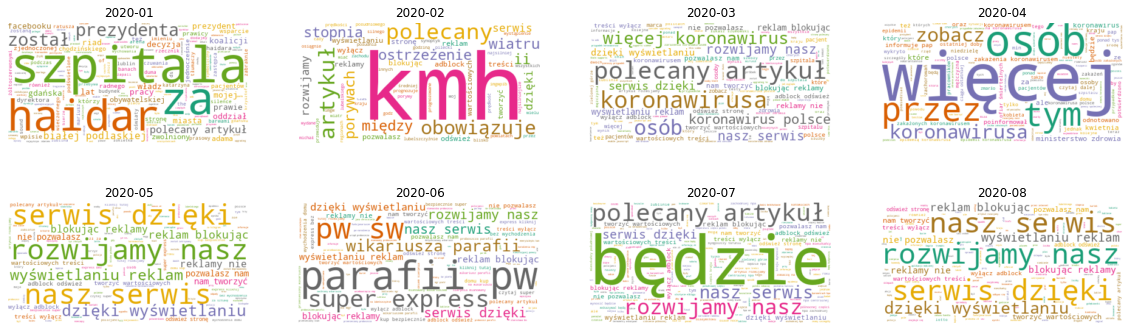

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 16]

full_names = ["2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08"]

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()